## Operations

In [1]:
import numpy as np

In [2]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

### Addition

In [3]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

### Multiplication

In [4]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var

### Matrix multiplication

In [5]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

### Placeholders

In [6]:
class Placeholder():
    "Placeholder for output calculation."
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

### Variables

In [7]:
class Variable():
    "Parameter/features of the graph."
    
    def __init__(self,initial_value=None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

### Graph

In [8]:
class Graph():
    "Creates the graph of the neural network."
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        # creates a global default graph, accessed by other functions 
        global _default_graph
        _default_graph = self

### Operation order

In [9]:
def traverse_postorder(operation):
    """Ensures that operations are executed in correct order."""
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [10]:
class Session:
    
    def run(self,operation,feed_dict={}):
        """Operation to be computed and input values
        of the features/placeholders"""
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

# Classification

## Activation Function

In [11]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def compute(self,z_val):
        return 1/(1+np.exp(-z_val))

## Create an example dataset

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

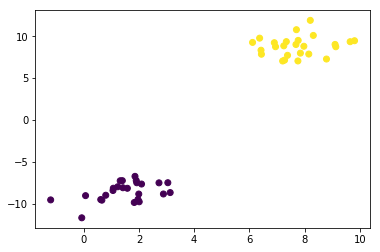

In [13]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

features = data[0]
labels = data[1]

plt.scatter(features[:,0],features[:,1],c=labels)

## Classify points

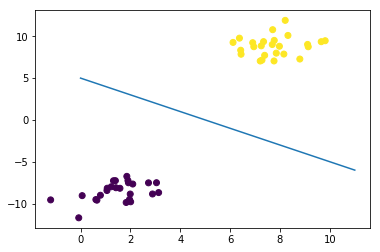

In [14]:
plt.scatter(features[:,0],features[:,1],c=labels)
x = np.array([0,11])
y = -x+5
plt.plot(x,y)

Hence we define our perceptron as $$ y = -x+5.$$

In [15]:
g = Graph()

g.set_as_default()

x = Placeholder()

w = Variable([1,1])

b = Variable(-5)

z = add(matmul(w,x),b)

a = Sigmoid(z)

sess = Session()

In [16]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [17]:
sess.run(operation=a,feed_dict={x:[2,-10]})

2.2603242979035746e-06

Which is consistent looking at the choosen values and the plots, however lets do a sanity check, see the plot below.

In [18]:
X,Y = np.mgrid[-5:15:0.3,-15:15:0.3]
points = np.vstack((X.flatten(), Y.flatten())).T
preds = []
for point in points:
    preds.append(np.round(sess.run(operation=a,feed_dict={x:list(point)})))

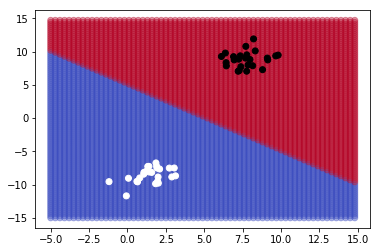

In [19]:
plt.scatter(points[:,0],points[:,1],c=preds,cmap='coolwarm',alpha=0.4)
plt.scatter(features[:,0],features[:,1],c=labels,cmap='Greys')